EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Los datos se leen en un dataframe maestro, y al final del EDA, se exportan distintos csv para la creacion de la base de datos SQL

In [2]:
df_maestro=pd.read_excel(r"C:\Users\Personal\Downloads\Internet.xlsx",sheet_name=None) #Leemos todas las hojas del excel en un diccionario de dataframes
type(df_maestro)

dict

In [3]:
df_maestro

{'Acc_vel_loc_sinrangos':          Provincia      Partido                           Localidad  \
 0     BUENOS AIRES   25 de Mayo                          25 de Mayo   
 1     BUENOS AIRES   25 de Mayo                     Agustín Mosconi   
 2     BUENOS AIRES   25 de Mayo                           Del Valle   
 3     BUENOS AIRES   25 de Mayo                           Ernestina   
 4     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   
 ...            ...          ...                                 ...   
 3061       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   
 3062       TUCUMAN      Trancas                San Pedro de Colalao   
 3063       TUCUMAN      Trancas                   Villa  de Trancas   
 3064       TUCUMAN  Yerba Buena                       Villa Carmela   
 3065       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   
 
      Link Indec  Otros  0,256 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  \
 0       6854100    NaN      

Como primeras ideas para el dashboard en power BI, se me ocurre revisar: 
- la relación entre las tecnologias predominantes por provincia y las velocidades promedio
- la relacion entre el acceso a internet y crecimiento o caída de ciertas tecnologias a lo largo del tiempo
- Penetración del internet en la población por regiones y su obvia relación con el desarrollo y la economía

Así que para tal objetivo, primero sacaremos los dataframes necesarios.

KPI´s:

Se proponen 3:

- Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre
- Medir los crecimientos de los ingresos generados por los servicios de internet y esperar un 2% trimestral

In [4]:
penetracion_poblacion=df_maestro['Penetración-poblacion'] #Empezamos nuestro EDA con estos 3 dataframes y vamos agregando conforme vayamos necesitando
penetracion_hogares=df_maestro['Penetracion-hogares']
penetracion_total=df_maestro["Penetracion-totales"]
velocidad_provincia=df_maestro["Velocidad % por prov"]
ingresos=df_maestro["Ingresos"]

Idea:
Las tablas de SQL pueden ser una de provincias con su Id, otra de partidas y otra de localidades, esta última con un Id de Provincia y Partida.

Otra tabla mas enfocada al cambio a lo largo del tiempo, con una columna del año, trimestre, provincia o la unidad de organización necesaria, e información como penetración por hogar y habitantes, velocidad promedio, totales de accesos, etc.

Así como tabla maestra de las tecnologías para asignarles un Id


**Penetración población**

In [5]:
penetracion_poblacion.info() #sin nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [6]:
penetracion_poblacion.describe() #nuestros datos van del 2014 al 2023, o sea 10 años de datos

,Año,Trimestre,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,15.394079
std,2.873778,1.118617,9.168959
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.750000,8.764189
50%,2018.500000,2.500000,13.417453
75%,2021.000000,3.250000,19.657928
max,2023.000000,4.000000,52.236739


In [7]:
promedio_accesos_habitante=penetracion_poblacion.groupby("Provincia")["Accesos por cada 100 hab"].mean().reset_index()
print(promedio_accesos_habitante)
promedio_accesos_habitante_anual=penetracion_poblacion.groupby("Año")["Accesos por cada 100 hab"].mean().reset_index()
promedio_accesos_habitante_anual

              Provincia  Accesos por cada 100 hab
0          Buenos Aires                 21.289629
1       Capital Federal                 46.083416
2             Catamarca                 10.130311
3                 Chaco                  9.206406
4                Chubut                 17.232239
5            Corrientes                  9.814617
6               Córdoba                 21.204449
7            Entre Ríos                 15.766444
8               Formosa                  7.074527
9                 Jujuy                  9.743484
10             La Pampa                 24.373473
11             La Rioja                 12.327633
12              Mendoza                 10.804444
13             Misiones                 10.206337
14              Neuquén                 19.062541
15            Río Negro                 16.946857
16                Salta                 10.517363
17             San Juan                  8.963649
18             San Luis                 14.167316


,Año,Accesos por cada 100 hab
0,2014,11.057695
1,2015,11.726770
2,2016,11.935179
3,2017,12.929861
4,2018,14.538694
5,2019,16.006368
6,2020,16.657562
7,2021,18.338900
8,2022,20.054660
9,2023,20.695104


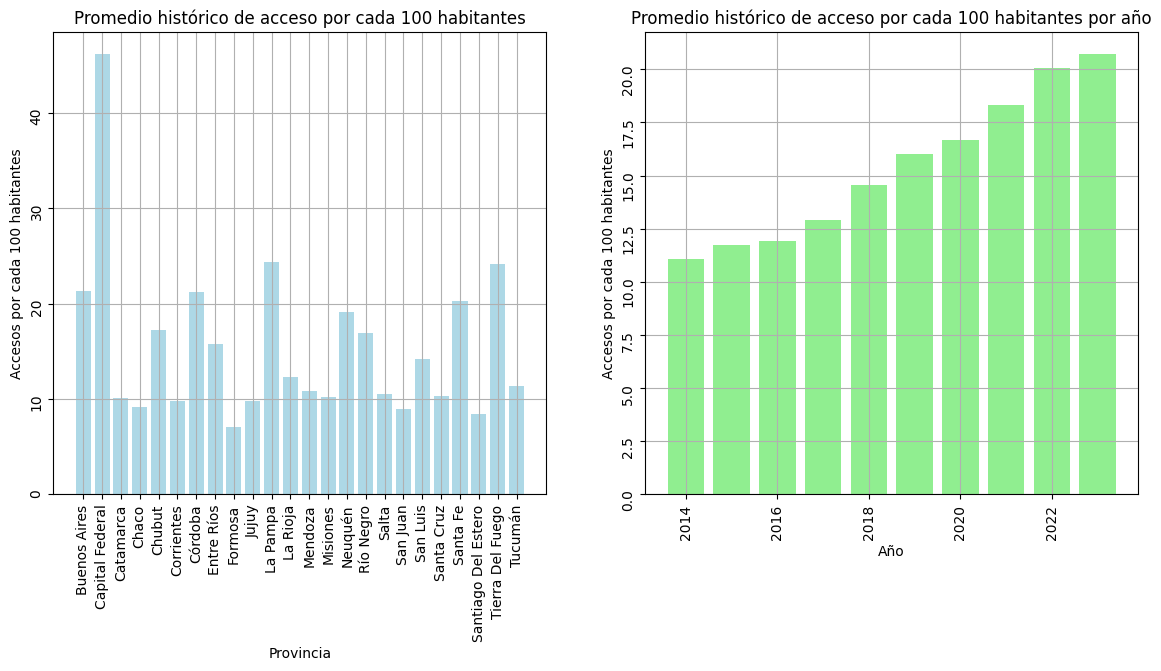

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Promedio accesos por cada 100 habitantes vs Provincia
ax1.bar(promedio_accesos_habitante["Provincia"], promedio_accesos_habitante["Accesos por cada 100 hab"], color='lightblue')
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos por cada 100 habitantes')
ax1.set_title('Promedio histórico de acceso por cada 100 habitantes')
ax1.tick_params(rotation=90)
ax1.grid(True)

# Promedio accesos por cada 100 habitantes vs Año
ax2.bar(promedio_accesos_habitante_anual["Año"], promedio_accesos_habitante_anual["Accesos por cada 100 hab"], color='lightgreen')
ax2.set_xlabel('Año')
ax2.set_ylabel('Accesos por cada 100 habitantes')
ax2.set_title('Promedio histórico de acceso por cada 100 habitantes por año')
ax2.tick_params(rotation=90)
ax2.grid(True)
plt.show()

Se nota una clara ventaja en el alcance de la población a internet en el área de la capital, así como un aumento al acceso con el tiempo en el país

**Penetracion hogares**

In [9]:
penetracion_hogares.info() #sin nulos una vez mas y con el tipo de dato correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [10]:
penetracion_hogares.describe() #de nuevo 10 años de datos

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405
std,2.873778,1.118617,23.898192
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.856870
50%,2018.500000,2.500000,48.817167
75%,2021.000000,3.250000,65.116858
max,2023.000000,4.000000,124.061394


In [11]:
promedio_accesos_hogar=penetracion_hogares.groupby("Provincia")["Accesos por cada 100 hogares"].mean().reset_index()
print(promedio_accesos_habitante)
promedio_accesos_hogar_anual=penetracion_hogares.groupby("Año")["Accesos por cada 100 hogares"].mean().reset_index()
promedio_accesos_hogar_anual

              Provincia  Accesos por cada 100 hab
0          Buenos Aires                 21.289629
1       Capital Federal                 46.083416
2             Catamarca                 10.130311
3                 Chaco                  9.206406
4                Chubut                 17.232239
5            Corrientes                  9.814617
6               Córdoba                 21.204449
7            Entre Ríos                 15.766444
8               Formosa                  7.074527
9                 Jujuy                  9.743484
10             La Pampa                 24.373473
11             La Rioja                 12.327633
12              Mendoza                 10.804444
13             Misiones                 10.206337
14              Neuquén                 19.062541
15            Río Negro                 16.946857
16                Salta                 10.517363
17             San Juan                  8.963649
18             San Luis                 14.167316


,Año,Accesos por cada 100 hogares
0,2014,36.891846
1,2015,39.198153
2,2016,39.889283
3,2017,42.525228
4,2018,48.477593
5,2019,53.666356
6,2020,56.130637
7,2021,61.978518
8,2022,67.823625
9,2023,70.042812


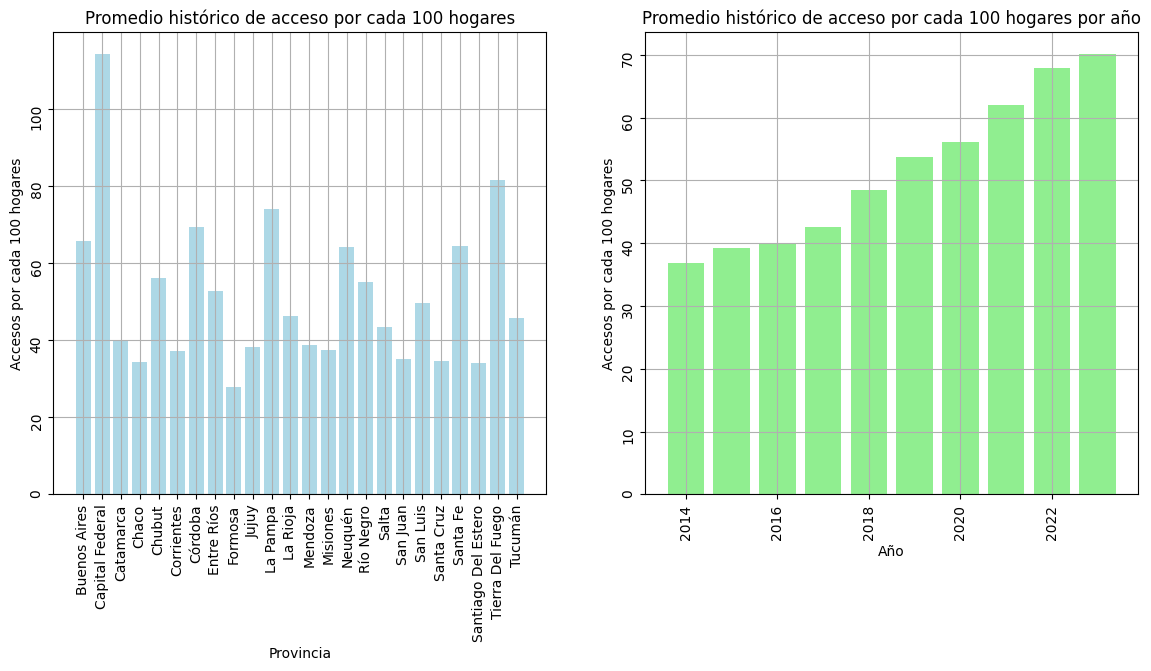

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Promedio accesos por cada 100 hogares vs Provincia
ax1.bar(promedio_accesos_hogar["Provincia"], promedio_accesos_hogar["Accesos por cada 100 hogares"], color='lightblue')
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos por cada 100 hogares')
ax1.set_title('Promedio histórico de acceso por cada 100 hogares')
ax1.tick_params(rotation=90)
ax1.grid(True)

# Promedio accesos por cada 100 hogares vs Año
ax2.bar(promedio_accesos_hogar_anual["Año"], promedio_accesos_hogar_anual["Accesos por cada 100 hogares"], color='lightgreen')
ax2.set_xlabel('Año')
ax2.set_ylabel('Accesos por cada 100 hogares')
ax2.set_title('Promedio histórico de acceso por cada 100 hogares por año')
ax2.tick_params(rotation=90)
ax2.grid(True)
plt.show()

Vemos que capital federal tiene mas de 1 acceso por hogar, se puede deber a distintas redes en un mismo lugar